# `코칭스터디 <Data Science 2024>`
- Jason코치_07팀_2주차_미션제출
- 리드부스터: 동동이_리더
- 부스터: 권순환, 김민서, 조수영, 나영민, 노아, 세현, Peridot

# 📌 미션에 도전하기 전에 먼저!!

이번 미션에 활용되는 데이터를 다운로드 받기 위해, 주피터 노트북에서 다음 셀을 먼저 실행해주세요.

In [133]:
# 데이터 로딩
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [134]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

In [135]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

# Q1️⃣

## 📌 Q1. 전국 시도별 약국수를 구해주세요!

상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
다음의 결과가 나오도록 구합니다.
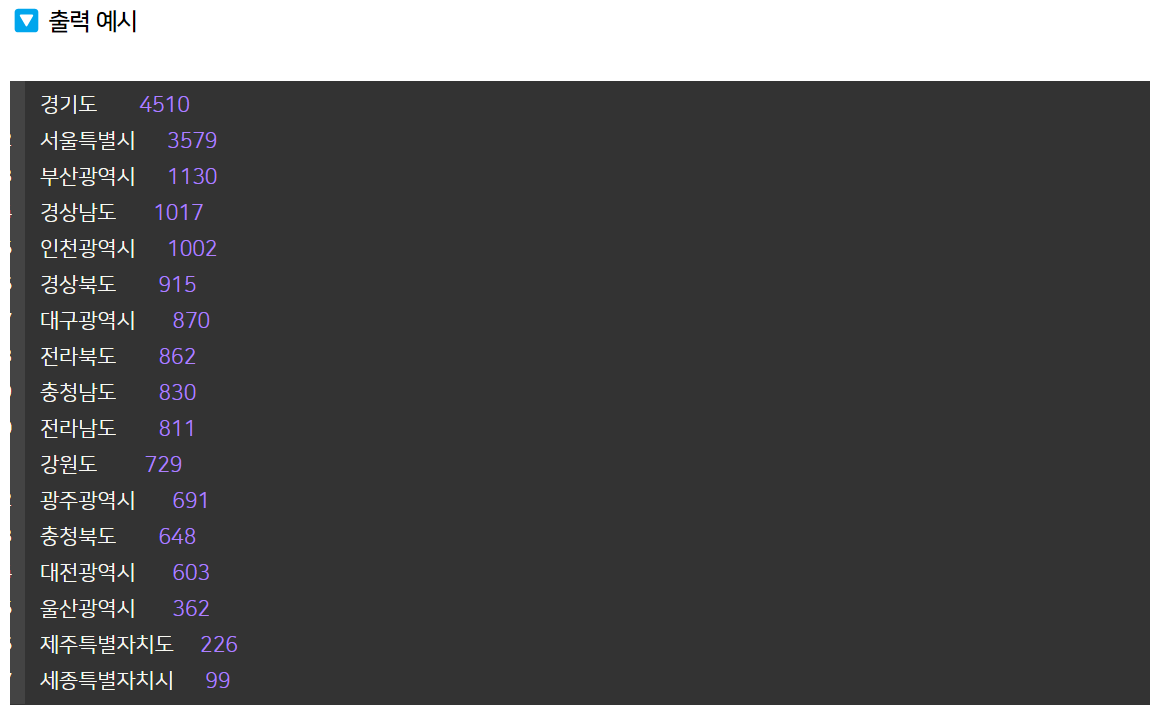

# A1️⃣

In [136]:
# 데이터 탐색
df.columns.tolist() # 컬럼명 확인하기

['상가업소번호',
 '상호명',
 '지점명',
 '상권업종대분류코드',
 '상권업종대분류명',
 '상권업종중분류코드',
 '상권업종중분류명',
 '상권업종소분류코드',
 '상권업종소분류명',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드',
 '시도명',
 '시군구코드',
 '시군구명',
 '행정동코드',
 '행정동명',
 '법정동코드',
 '법정동명',
 '지번코드',
 '대지구분코드',
 '대지구분명',
 '지번본번지',
 '지번부번지',
 '지번주소',
 '도로명코드',
 '도로명',
 '건물본번지',
 '건물부번지',
 '건물관리번호',
 '건물명',
 '도로명주소',
 '구우편번호',
 '신우편번호',
 '동정보',
 '층정보',
 '호정보',
 '경도',
 '위도']

In [137]:
# 데이터 탐색 상위 5개 보기
df.head() # 기본 5개로 설정되어있다. 

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [138]:
# 약국 정보를 담고 있는 컬럼과 시도별 컬럼 확인
# '상권업종소분류명'이 약국인 데이터만 필터링
farmacia = df[df["상권업종소분류명"] == "약국"]

# 시도별 약국수 집계
farmacia_count = farmacia["시도명"].value_counts()

# 결과 출력
print(farmacia_count)

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64


# A2️⃣

In [139]:
# 'farmacia_counts_pivot' DataFrame을 '상권업종소분류명'의 개수 기준으로 내림차순 정렬하고 출력
farmacia_counts_pivot = farmacia_counts_pivot.sort_values(
    by='상권업종소분류명', # 정렬 기준이 되는 열, 여기서는 '상권업종소분류명'의 개수
    ascending=False         # 내림차순으로 정렬
)

In [140]:
# 결과 출력
print(farmacia_counts_pivot)

         상권업종소분류명
시도명              
경기도          4510
서울특별시        3579
부산광역시        1130
경상남도         1017
인천광역시        1002
경상북도          915
대구광역시         870
전라북도          862
충청남도          830
전라남도          811
강원도           729
광주광역시         691
충청북도          648
대전광역시         603
울산광역시         362
제주특별자치도       226
세종특별자치시        99


# "상권업종소분류명"이 "약국"인 데이터의 빈도수의 시각화

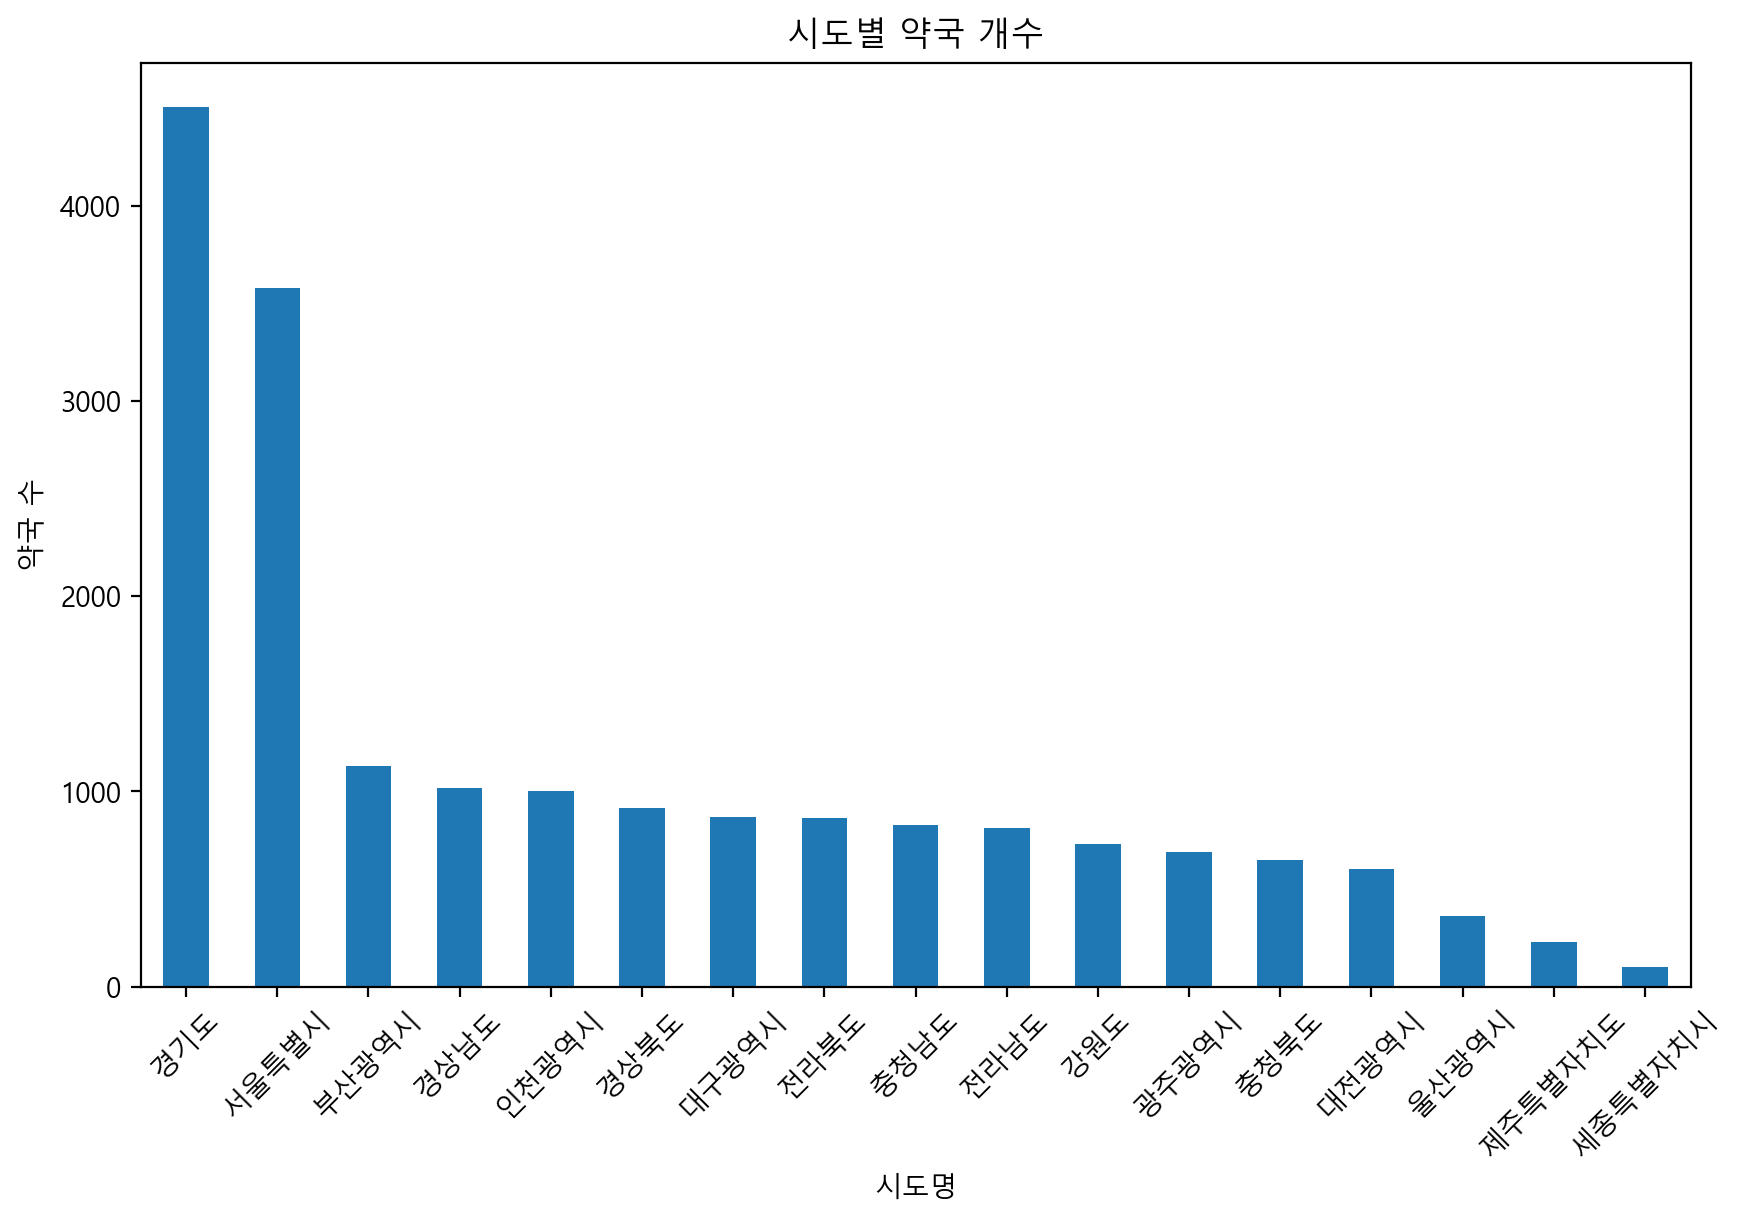

In [141]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
farmacia_count.plot(kind='bar')
plt.title('시도별 약국 개수') # 타이틀 레이블 이름
plt.xlabel('시도명')  # x축 레이블 이름
plt.ylabel('약국 수') # y 축 레이블 이름
plt.xticks(rotation=45)  # x축 레이블 글씨가 겹치지 않도록 45도 회전
plt.show()

In [142]:
farmacia_count_nomalize=farmacia['시도명'].value_counts(normalize=True)

<AxesSubplot:>

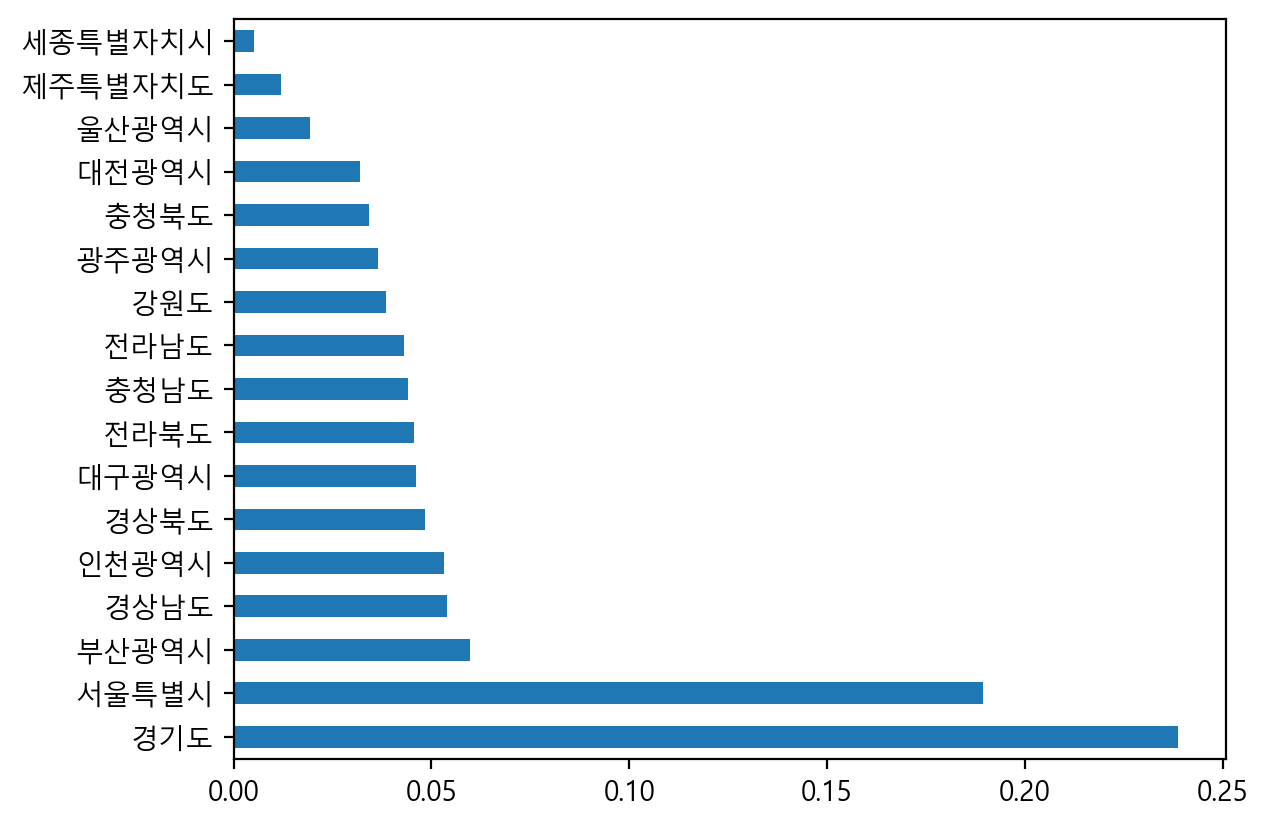

In [143]:
# Pandas 에는 plot기능을 내장하고 있습니다.
# 위에서 분석한 시도명 수를 막대그래프로 표현해 봅니다.
farmacia_count_nomalize.plot.barh()

<AxesSubplot:ylabel='시도명'>

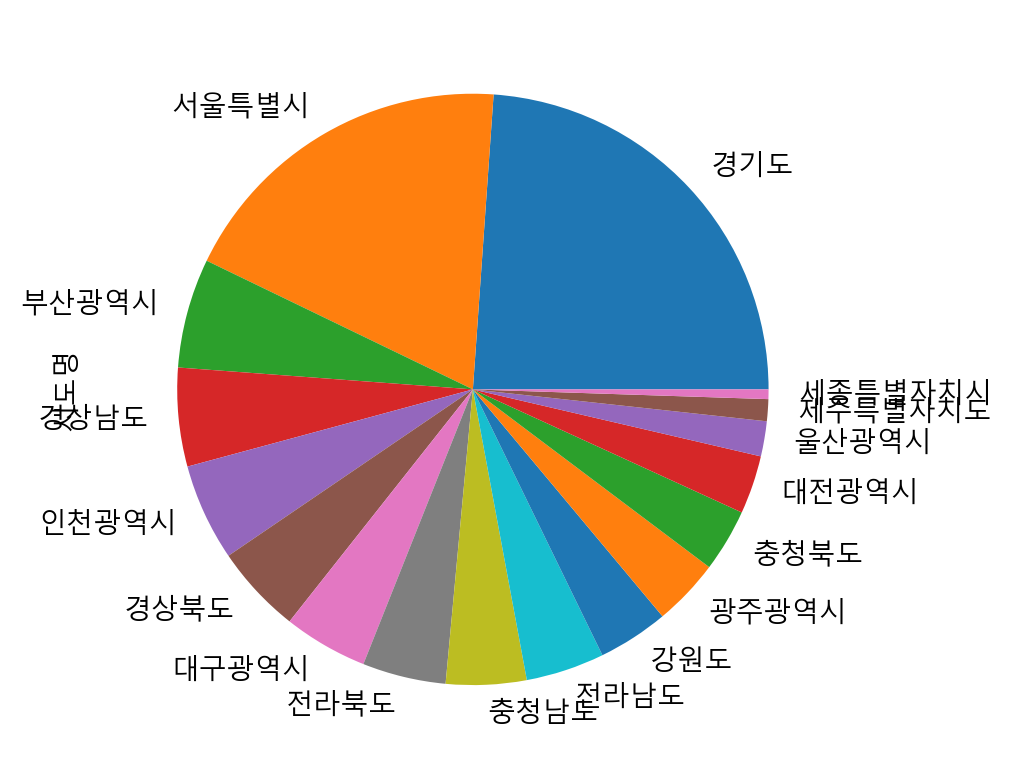

In [144]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
farmacia_count_nomalize.plot.pie()

<AxesSubplot:xlabel='count', ylabel='시도명'>

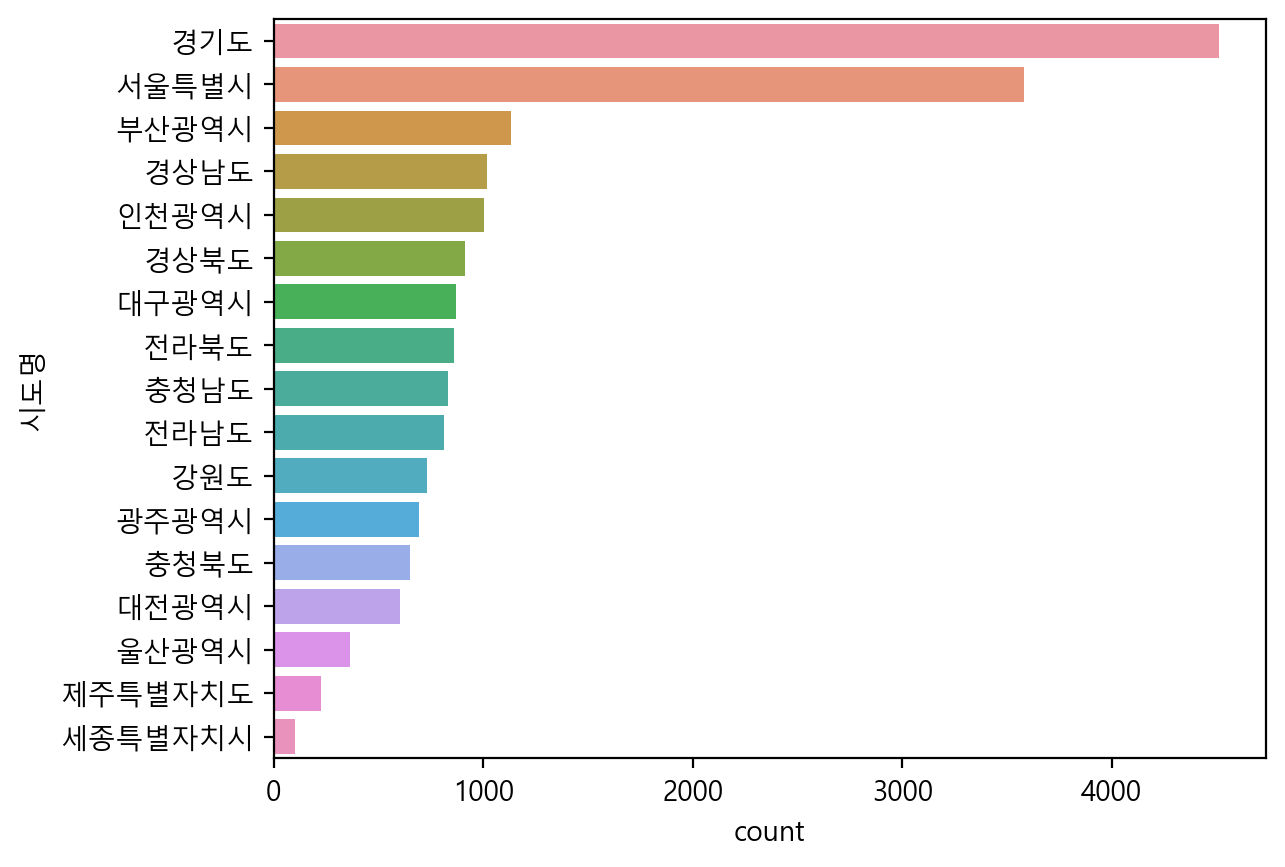

In [145]:
import seaborn as sns
sorted_index = farmacia['시도명'].value_counts().index
# seaborn의 countplot으로 그려보기
sns.countplot(data=farmacia, y='시도명', order=sorted_index)

# Q2️⃣
📌 Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

- 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
- 다음의 결과가 나오도록 구합니다.
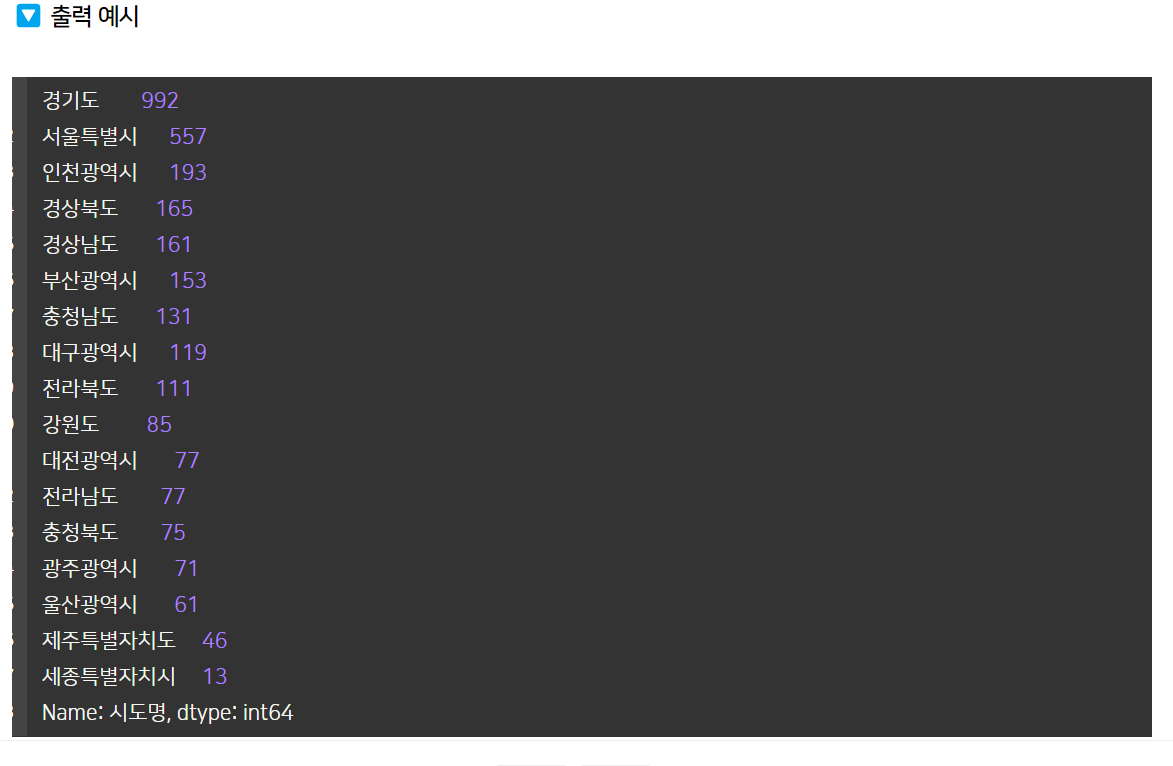

# A1️⃣

In [146]:
# "동물병원"만 
pet_hospital = df[df["상권업종소분류명"] == "동물병원"]

#빈도수
pet_hospital_counts = pet_hospital["시도명"].value_counts()

pet_hospital_counts

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64

# "상권업종소분류명"이 "동물병원"인 데이터의 빈도수의 시각화

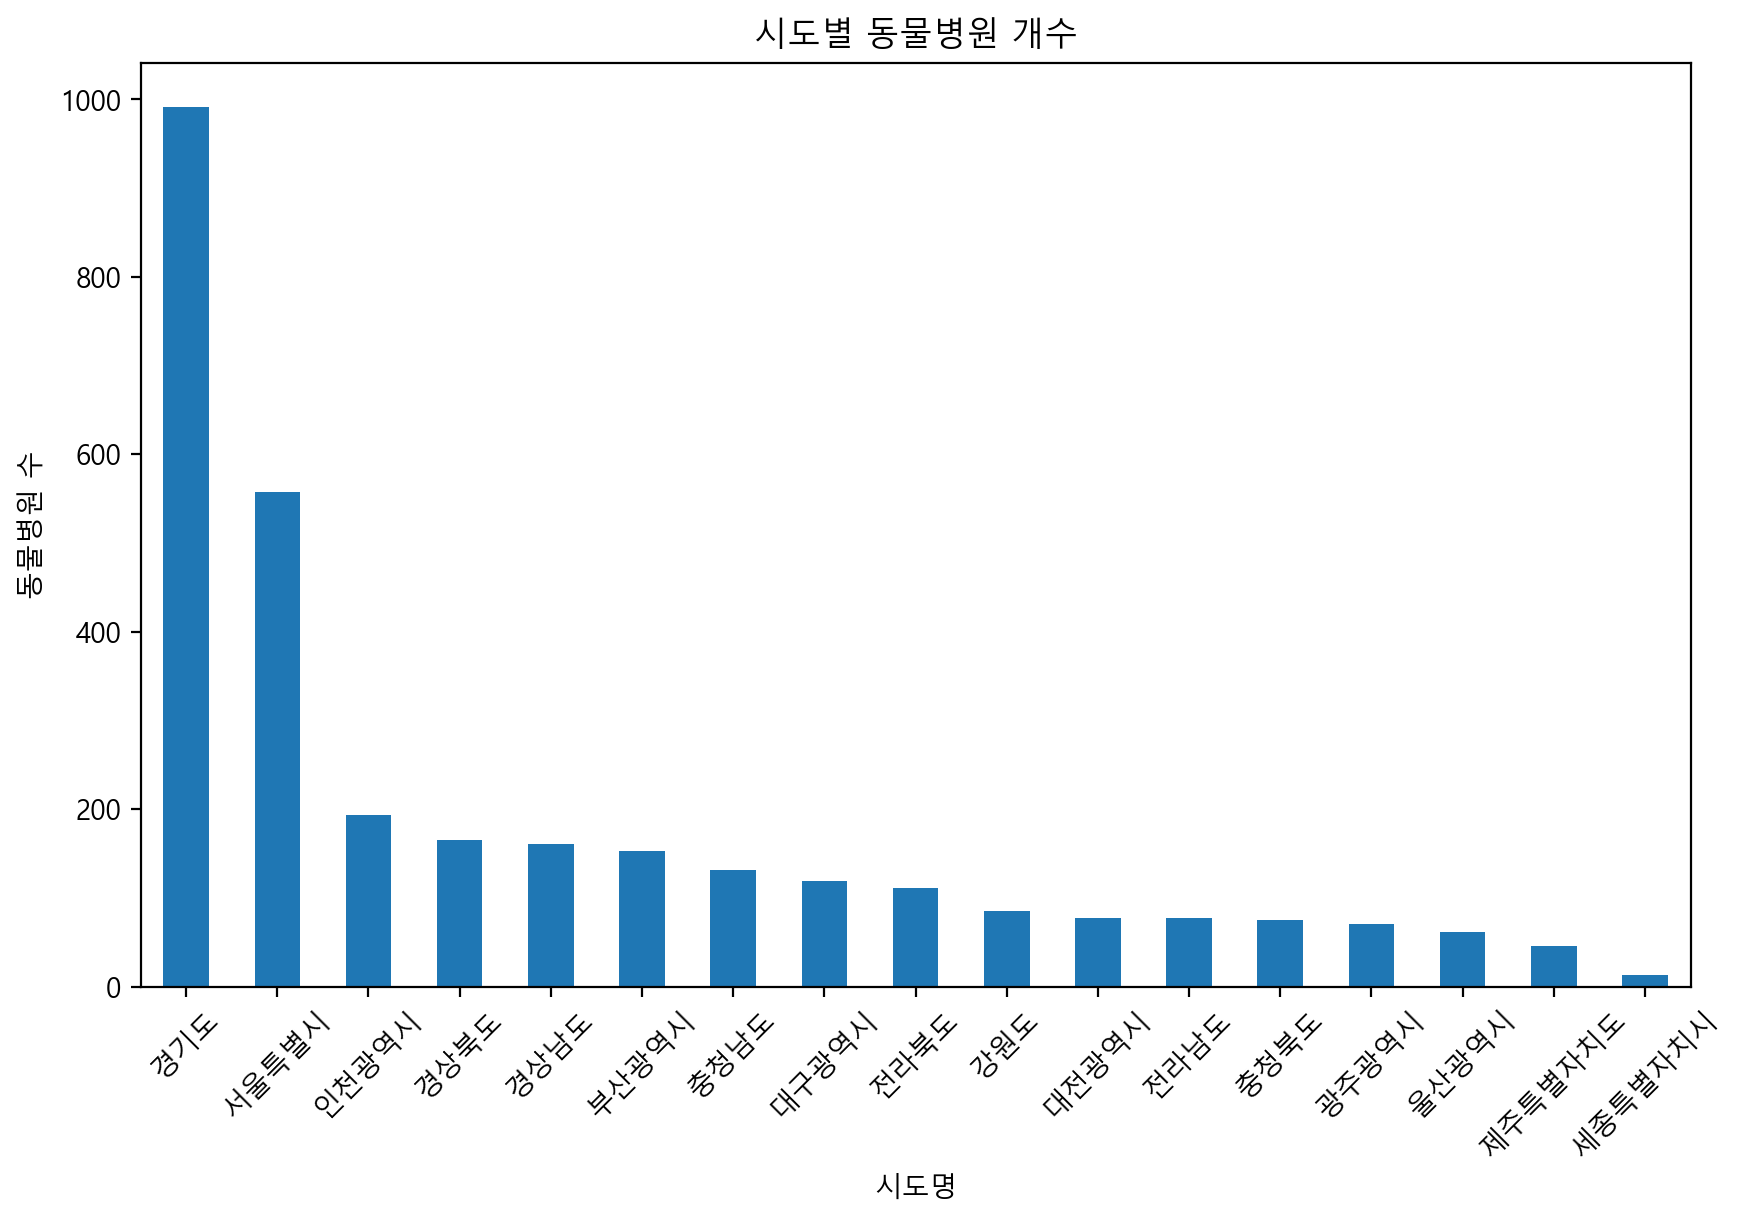

In [147]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
pet_hospital_counts.plot(kind='bar')
plt.title('시도별 동물병원 개수')  # 타이틀 레이블 이름
plt.xlabel('시도명')  # x축 레이블 이름
plt.ylabel('동물병원 수')  # y 축 레이블 이름
plt.xticks(rotation=45) # x축 레이블 글씨가 겹치지 않도록 45도 회전
plt.show()

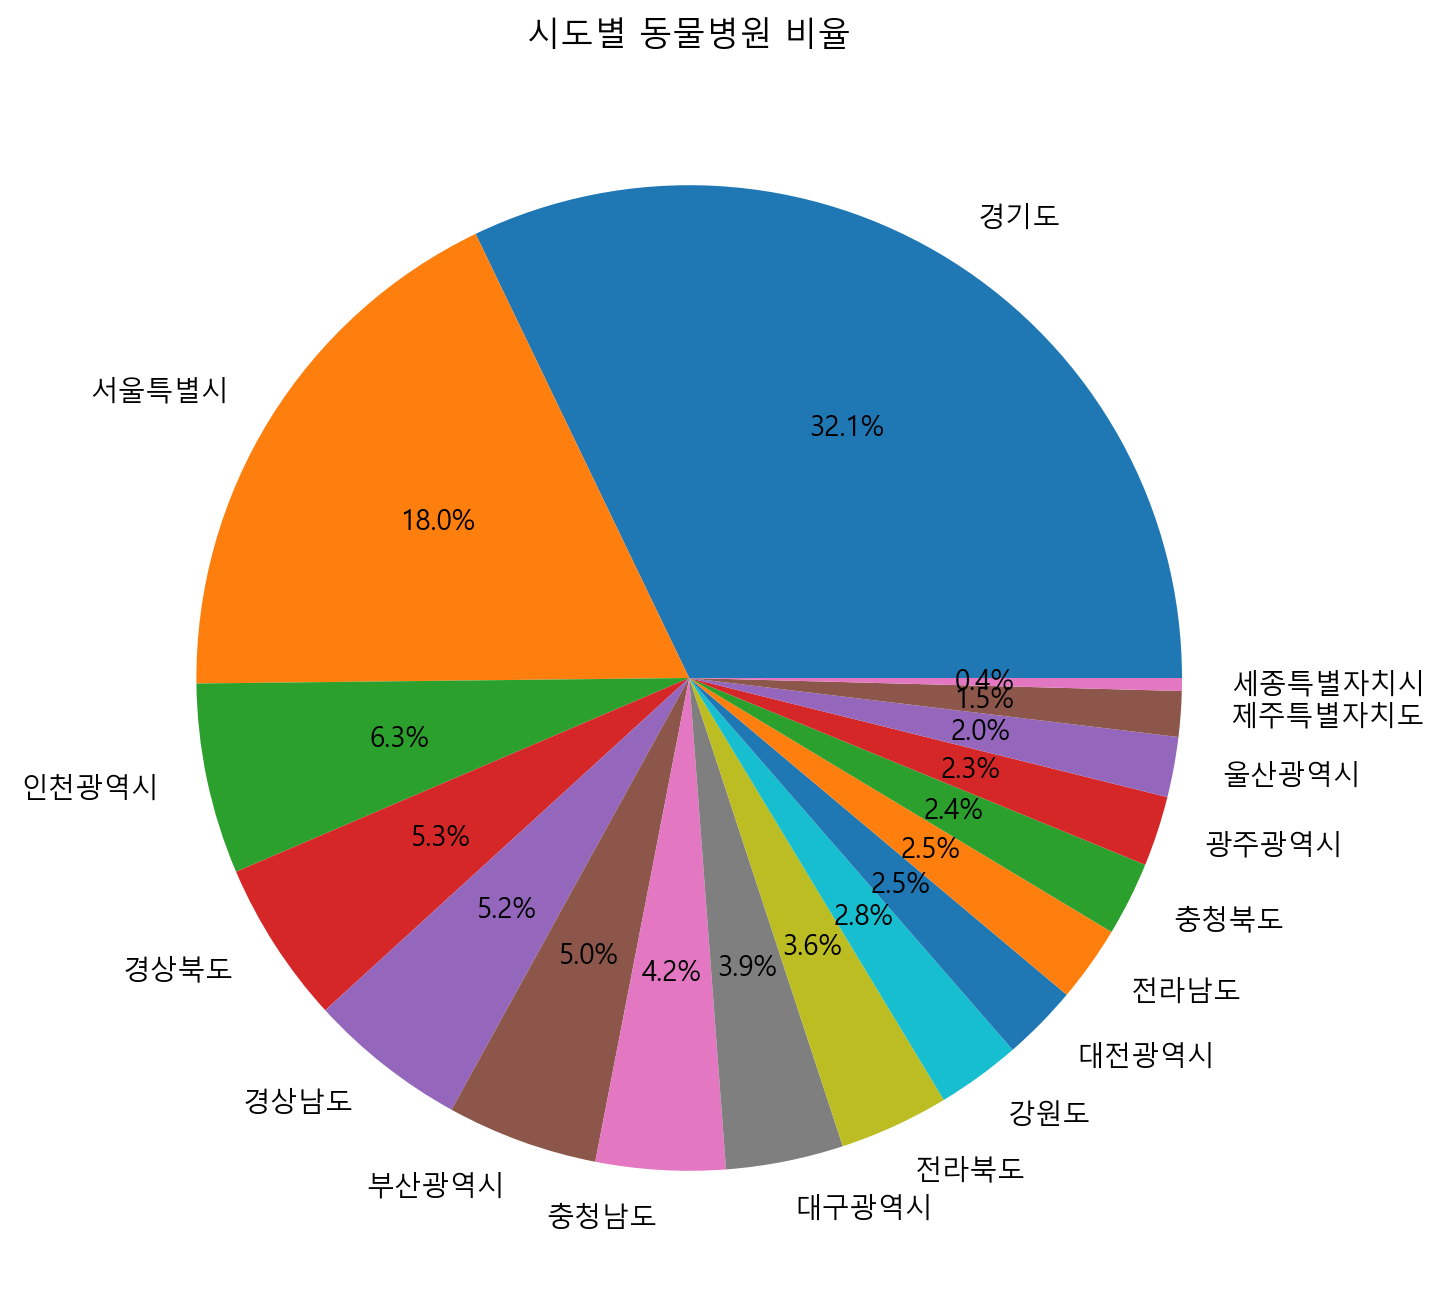

In [148]:
counts = pet_hospital['시도명'].value_counts()

# 원그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('시도별 동물병원 비율')
plt.show()

<AxesSubplot:xlabel='count', ylabel='시도명'>

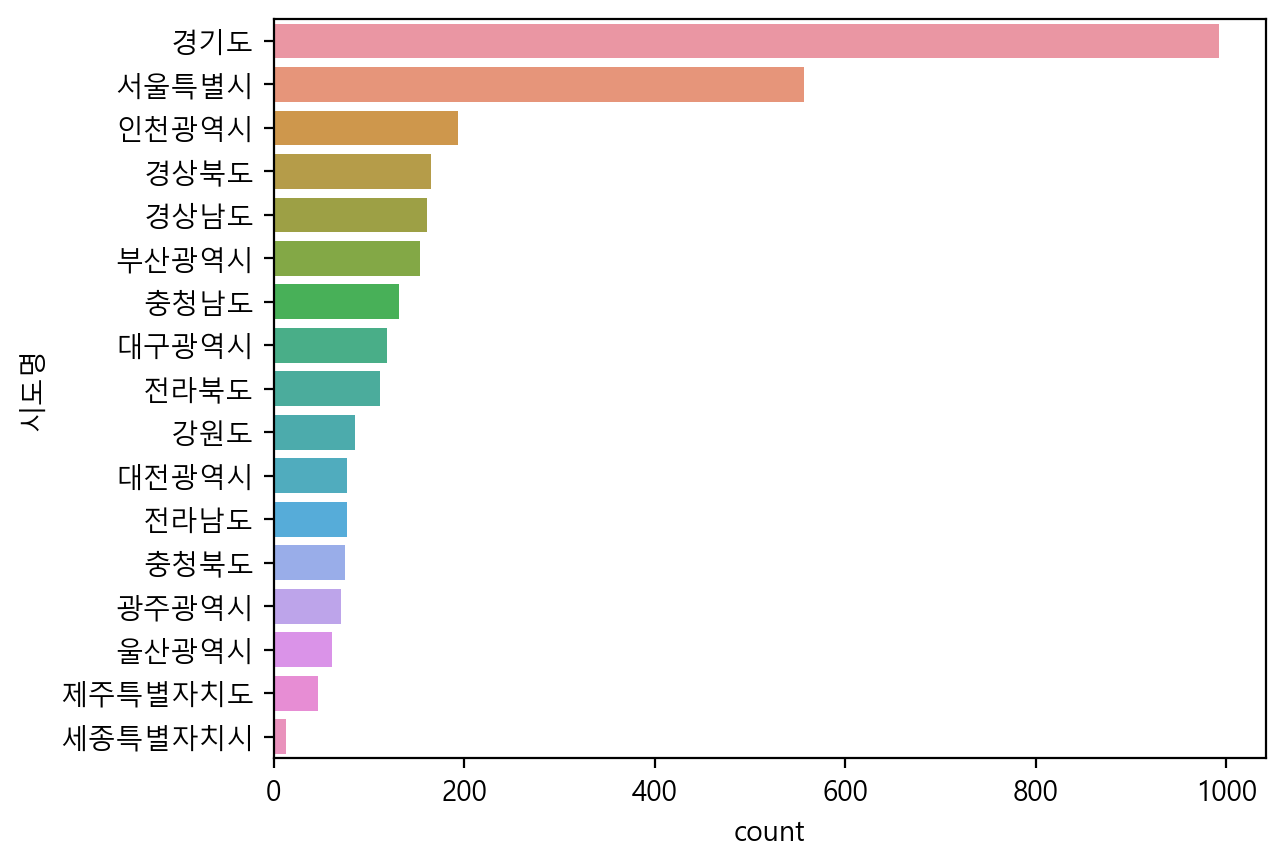

In [149]:
# '시도명'별로 개수를 세고 내림차순으로 정렬
sorted_index = pet_hospital['시도명'].value_counts().index

sns.countplot(data=pet_hospital, y='시도명', order=sorted_index)

# Q3️⃣
📌Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

```
서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
비율이 높은 순서대로 정렬되게 구해주세요!
수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!
```
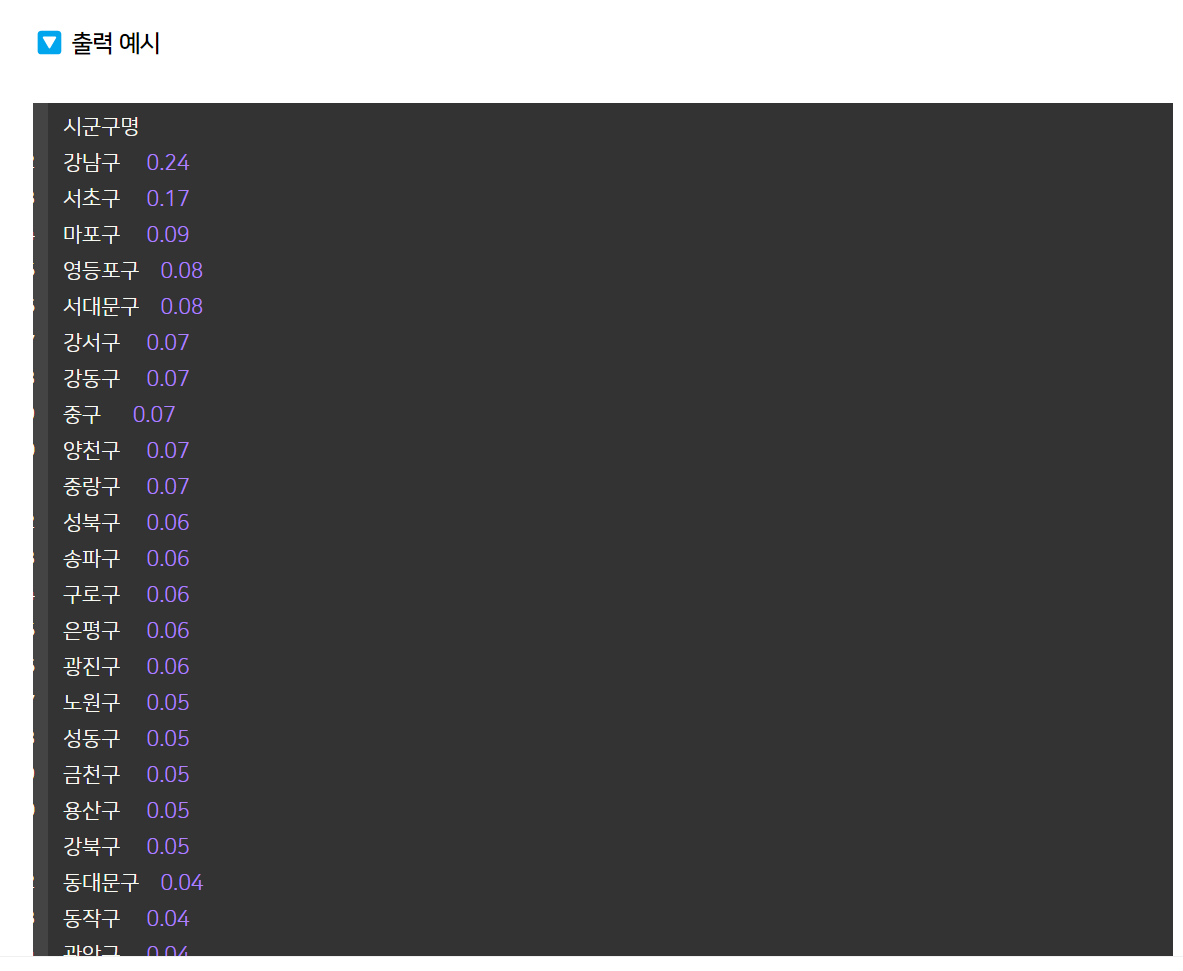

In [150]:
# '서울특별시'에 위치한 병원 데이터 필터링
seoul_hospitals_df = df[(df['시도명'] == '서울특별시') & (df['상권업종중분류명'] == '병원')]

# '상권업종소분류명'에 "피부" 또는 "성형"이 포함된 데이터 필터링
skin_surgery_hospitals_df = seoul_hospitals_df[
    seoul_hospitals_df['상권업종소분류명'].str.contains('피부|성형')
]

# 시군구별 피부과, 성형외과 수 집계
skin_surgery_counts = skin_surgery_hospitals_df['시군구명'].value_counts()

# 시군구별 전체 병원 수 집계
total_hospitals_counts = seoul_hospitals_df['시군구명'].value_counts()

# 비율 계산 및 Pandas round 사용
ratio = (skin_surgery_counts / total_hospitals_counts).round(2)

# 비율이 높은 순서대로 정렬
ratio_sorted = ratio.sort_values(ascending=False)

# 결과 출력
print(ratio_sorted)

강남구     0.24
서초구     0.17
마포구     0.09
영등포구    0.08
서대문구    0.08
강서구     0.07
강동구     0.07
중구      0.07
양천구     0.07
중랑구     0.07
성북구     0.06
송파구     0.06
구로구     0.06
은평구     0.06
광진구     0.06
노원구     0.05
성동구     0.05
금천구     0.05
용산구     0.05
강북구     0.05
동대문구    0.04
동작구     0.04
관악구     0.04
종로구     0.03
도봉구     0.02
Name: 시군구명, dtype: float64


# Q4️⃣
📌Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
folium 문서 : https://python-visualization.github.io/folium/quickstart.html

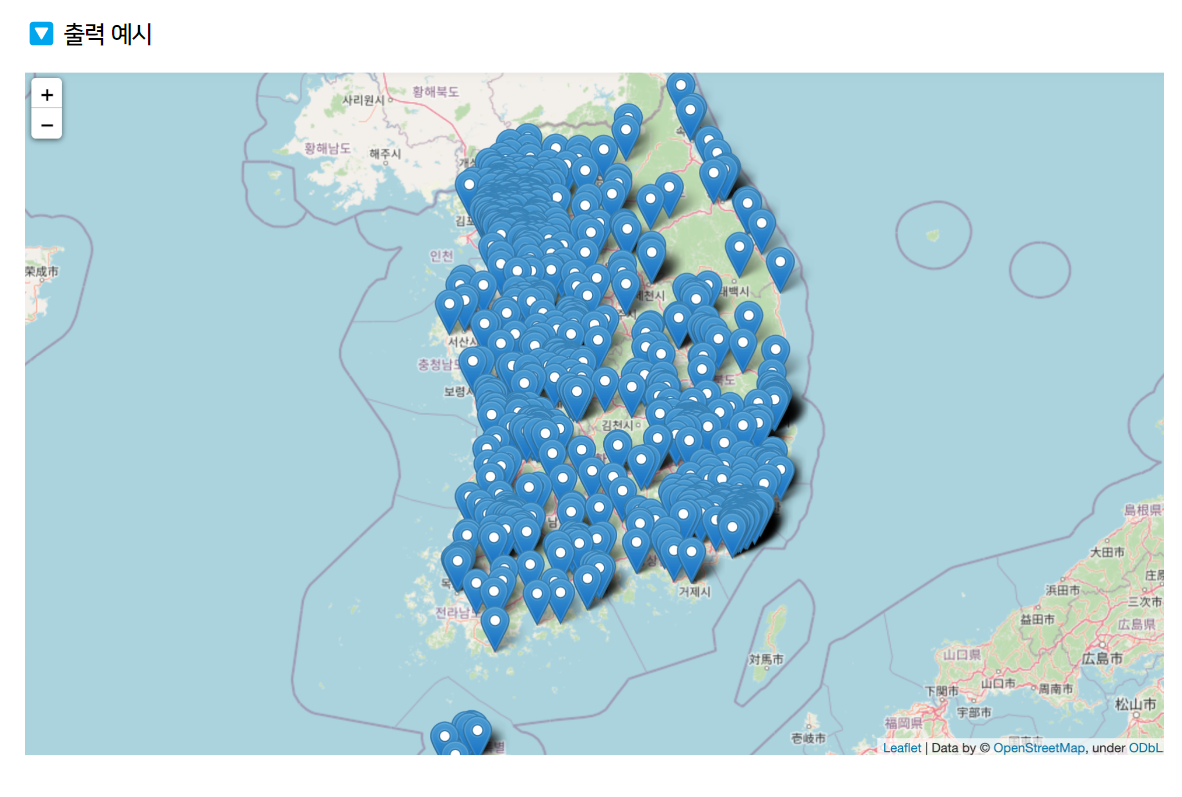

In [151]:
# !pip install folium
import folium

In [152]:
senior_hospitals_df = df[df['상권업종소분류명'] == '노인/치매병원']

In [153]:
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

In [154]:
for idx, row in senior_hospitals_df.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['상호명'],
        icon=folium.Icon(color='purple', icon='cloud')
    ).add_to(m)

# 지도 출력
m.save("senior_hospitals_map.html")
m
